# Connect Database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [54]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip install clean-text
!pip install optuna scikit-learn

2023-03-26 17:33:17.849765: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-26 17:33:17.849889: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-26 17:33:17.849910: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple

In [3]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [4]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Text Preprocessing

## Load Data

In [5]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime.txt', sep='|')
sanook

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
952,"The old man is faint, 4 years old until the bl...",The police at Na Pho police station in Buriram...
953,The security guards followed the security guar...,"At 09.00 hrs. On 21 September, Pol.Col. Sathit..."
954,"6 wheels break!Crashed into the motorcycle, ex...",6 -wheel trucks In the middle of the intersect...
955,Broker hiring a 13 -year -old girl to work in ...,Broker hiring a 13 -year -old girl to work in ...


In [6]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_thairath_en.txt', sep='|')
thairath

,title,content
0,Maj. Gen. Wirachai Mercy shaved his head and m...,"Enter the parachute ""Maj. Gen. Wirachai Songme..."
1,"Rescuers find important evidence, axe-knife of...",The rescuer found the axe-knife of the middle....
2,"To issue the ""Police Sword Ching Thong"", order...","Chief Of Staff Sign the order for the ""Police ..."
3,Police sword Ching Thong confessed to the stre...,"Big Joke Pol. Gen. Surachet Hakpal, Deputy Chi..."
4,Drunkenness Stepson extinguished from mother-i...,"Dragging his neck to the smoke, a drunken youn..."
...,...,...
778,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
779,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
780,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
781,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [7]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens..."
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76..."
...,...,...
1735,The police officer has been deceived by the ca...,The victim's representative cried. The police ...
1736,No surprises. Prosecutor Star points to waterm...,Star Prosecutor points to the watermelon case....
1737,"191 Attached to the rank of ""Police Dog"" to ""A...",Commander 191 was awarded the Police Dog Award...
1738,"3 men selling marijuana, robbing tourists, cla...",3 young men selling marijuana on Khao San Road...


In [8]:
df_raw_sport = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport.txt', sep='|')
df_raw_sport

,title,content
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout..."
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t..."
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won..."
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...
...,...,...
921,"Not disappointed!Thailand smashed Taiwan 3-1, ...","October 7, 20:00 at 16:00 hrs. At Viet Tri Sta..."
922,Beyond resistance!Thai women volleyball defeat...,The 2022 World Women's Volleyball Championship...
923,The second half!Buriram United invaded Lamphun...,"Handrax Revo Thai League 2022/23, 8th Friday, ..."
924,"Eliminated but impressed!Foreign comments""Thai...",3 matches have passed for the Thai female rubb...


In [9]:
df_raw_politic = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politic_en.txt', sep='|')
df_raw_politic

,title,content
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H..."
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co..."
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M..."
...,...,...
703,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ..."
704,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...
705,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...
706,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...


In [10]:
bbc = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/BBCNewsTrain.csv')
bbc

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [11]:
bbc.rename(columns = {'Text' : 'content', 'Category' : 'tag'}, inplace = True)
bbc.dropna().reset_index(drop=True)
bbc

,ArticleId,content,tag
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [12]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"Can play every day!Opening the warp ""Kim Mi-Ju...","Take to know Kim Mi-Ju, one of the famous Sout...",sport
1,"Big chest is the reason!""Minami Wiji"" from a f...","Regarded as another beautiful girl, raw fish t...",sport
2,Summary of the Premier League football match 2...,"The head of the Man City opened the house, won...",sport
3,"Clear angels ""Phen Pheng"", the most female mod...",Considered as another girl who likes to exerci...,sport
4,"Come quickly!The most famous guru ""Ten Hak"" wa...",The famous Richard Key Guru revealed that the ...,sport


In [13]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime


In [14]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,Thammasat warned ministers to be wary of falli...,"captain Thammasat Brahmaputra, Member of the H...",politics
1,Governor Chatchachart attended the ceremony to...,Chatchat-Pavena-Seetha attended the ceremony o...,politics
2,Demonstration Minister Reiterate that there ar...,Mr. Sathit Patutecha Deputy Minister of Health...,politics
3,The former MP is worried if Prayuth is out of ...,"Mr. Somchai Srisuttayakorn, Former Election Co...",politics
4,Doctor Ravi warns the government! The far-righ...,"Today (May 27), Dr. Ravi Maschamadol, a list M...",politics


In [15]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_politic], join="inner", ignore_index=True)

In [16]:
df_raw

,title,content,tag
0,The young man drove the rich on the highway.Li...,The young man lifted up the police station. 1 ...,crime
1,Grandma led the grandchildren to report more.T...,"Grandmother, Primary 5, reported to the offens...",crime
2,8 -year -old girl raped by a neighborThe wife ...,8 -year -old girl raped by a neighbor The wife...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",The true stepfather-mother attacked the 6-year...,crime
4,"Certainly drunk, Closed Circuit, capturing a g...","Closed circuit captures a minute, a taxi, a 76...",crime
...,...,...,...
3369,U.N. representatives are concerned about the r...,"Glemont Wool, Special Reporter for the United ...",politics
3370,"Lightning ""Inspector Shua"" left the civil serv...",Inspector Sue to leave the government service ...,politics
3371,"Bangkok reveals 8 electoral district formats, ...",Electoral Commission Bangkok Unveiled the form...,politics
3372,Pravit Dharmadhanas oversees the Northern Camp...,Gen. Pravit Wongsuwan The head of the Prachara...,politics


In [17]:
df_raw = df_raw.dropna().reset_index(drop=True)
df_raw['content'] = df_raw['title'] + ' ' + df_raw['content']
df_raw.drop('title',axis=1,inplace=True)
df_raw

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
3367,U.N. representatives are concerned about the r...,politics
3368,"Lightning ""Inspector Shua"" left the civil serv...",politics
3369,"Bangkok reveals 8 electoral district formats, ...",politics
3370,Pravit Dharmadhanas oversees the Northern Camp...,politics


In [18]:
df = pd.concat([df_raw, bbc[['content', 'tag']]], join="inner", ignore_index=True)
df.dropna().reset_index(drop=True)
df

,content,tag
0,The young man drove the rich on the highway.Li...,crime
1,Grandma led the grandchildren to report more.T...,crime
2,8 -year -old girl raped by a neighborThe wife ...,crime
3,"Stepfather-real mother, attacking his 6-year-o...",crime
4,"Certainly drunk, Closed Circuit, capturing a g...",crime
...,...,...
4857,double eviction from big brother model caprice...,entertainment
4858,dj double act revamp chart show dj duo jk and ...,entertainment
4859,weak dollar hits reuters revenues at media gro...,business
4860,apple ipod family expands market apple has exp...,tech


## Clean Data

In [19]:
import re
from cleantext import clean

def clean_data(text):
  text = text.lower()
  text = clean(text, no_emoji = True, no_line_breaks = True)
  text = re.sub('[^\w\s]+', '', text)
  text = re.sub('\d+', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text.strip()

## Normalization (Lemmatization)

In [20]:
import pattern
from pattern.en import lemma, lexeme

In [21]:
def lemmatize_word(list_word):
  return [lemma(w) for w in list_word]

## Stop word removal

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [23]:
def remove_stopword(tokens):
  token = [w for w in tokens if not w in stop_words]
  return token

## Final Preprocessing

In [26]:
def preprocessing(text):
  # clean data
  text = clean_data(text)
  # tokenize 
  token = nltk.word_tokenize(text)
  # remove stop words from tokens
  stop_token = remove_stopword(token)
  # lemmatise tokens
  lemma_word = lemmatize_word(stop_token)
  text = ' '.join(word for word in lemma_word)
  return text

In [27]:
df['clean'] = df['content'].apply(preprocessing)
df.head()

,content,tag,clean
0,The young man drove the rich on the highway.Li...,crime,young man drive rich highwaylift police statio...
1,Grandma led the grandchildren to report more.T...,crime,grandma lead grandchildren report morethe monk...
2,8 -year -old girl raped by a neighborThe wife ...,crime,year old girl rape neighborthe wife slanderthe...
3,"Stepfather-real mother, attacking his 6-year-o...",crime,stepfatherreal mother attack yearold son break...
4,"Certainly drunk, Closed Circuit, capturing a g...",crime,certainly drink close circuit capture ghost ta...


In [28]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,content,tag,clean,tag_id
4842,golden economic period to end ten years of g...,business,golden economic period end ten year golden eco...,3
4843,ferrero eyes return to top form former world n...,sport,ferrero eye return top form former world numbe...,1
4844,kelly trails new discipline power teachers cou...,politics,kelly trail new discipline power teacher can g...,2
4845,dallaglio eyeing lions tour place former engla...,sport,dallaglio eyee lion tour place former england ...,1
4846,indy buys into india paper irish publishing gr...,business,indy buy india paper irish publish group indep...,3
4847,budget to set scene for election gordon brown ...,politics,budget set scene election gordon brown seek pu...,2
4848,bollywood draws global stars british actress a...,entertainment,bollywood draw global star british actres anto...,5
4849,web logs aid disaster recovery some of the mos...,tech,web log aid disaster recovery vivid descriptio...,4
4850,visa row mandarin made sir john the top civil ...,politics,visa row mandarin make sir john top civil serv...,2
4851,high fuel costs hit us airlines two of the lar...,business,high fuel cost hit u airline two largest airli...,3


In [29]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
1740,sport,1
2666,politics,2
3372,business,3
3375,tech,4
3379,entertainment,5


In [30]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime',
 1: 'sport',
 2: 'politics',
 3: 'business',
 4: 'tech',
 5: 'entertainment'}

In [31]:
tag_to_id

{'crime': 0,
 'sport': 1,
 'politics': 2,
 'business': 3,
 'tech': 4,
 'entertainment': 5}

# TFIDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tfidf  = TfidfVectorizer(
  stop_words = 'english',                      # ป้อนรายการคำ Stop words 
  ngram_range = (1,2),                         # อยากวิเคราะห์แบบ 2 คำ ติดกัน
  min_df = 5,                                  # ขั้นต่ำของ Doc Freq ของ Term
  max_df = 0.95,
  max_features = 30000,
  norm='l2'
)
# int(df.shape[0] * 0.001)

In [37]:
tfidvec_train = tfidf.fit_transform(df['clean'])

In [38]:
features = tfidvec_train.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
labels = df.tag_id

In [40]:
from sklearn.feature_selection import chi2
N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for tag, tag_id in sorted(tag_to_id.items()):
  features_chi2 = chi2(features, labels == tag_id)                        # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names_out())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(tag))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . firm
       . growth
       . bn
  . Most correlated bigrams:
       . economic growth
       . analyst say
       . bn bn
# 'crime':
  . Most correlated unigrams:
       . arrest
       . officer
       . police
  . Most correlated bigrams:
       . maj gen
       . police officer
       . police station
# 'entertainment':
  . Most correlated unigrams:
       . album
       . award
       . film
  . Most correlated bigrams:
       . film festival
       . best film
       . box office
# 'politics':
  . Most correlated unigrams:
       . prime
       . minister
       . party
  . Most correlated bigrams:
       . house representative
       . gen prayuth
       . prime minister
# 'sport':
  . Most correlated unigrams:
       . league
       . game
       . team
  . Most correlated bigrams:
       . premier league
       . manchester unite
       . national team
# 'tech':
  . Most correlated unigrams:
       . broadband
       . micro

In [42]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 
projected_features.shape

(1458, 2)

In [43]:
my_id = 0 # Select a tag_id
projected_features[(labels[indices] == my_id).values]

array([[20.136522 , 24.2163   ],
       [29.453138 ,  5.907222 ],
       [27.334808 , 13.461908 ],
       ...,
       [43.97555  , 27.852377 ],
       [23.87669  ,  2.0332403],
       [30.371101 ,  4.059359 ]], dtype=float32)

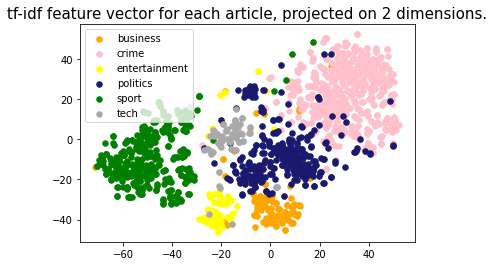

In [44]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey', 'yellow']

# Find points belonging to each category and plot them
for tag,tag_id in sorted(tag_to_id.items()):
    points = projected_features[(labels[indices] == tag_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[tag_id], label=tag)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

# Prepare Train & Test Dataset

In [45]:
from sklearn.model_selection import train_test_split

In [ ]:
# train = df.sample(frac=0.9,random_state=200)
# test = df.drop(train.index)

In [46]:
X = tfidf.fit_transform(df['clean']) 
y = df['tag']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=df['tag'])

In [48]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3889, 29337) (3889,)
(973, 29337) (973,)


In [49]:
y_train.value_counts()/y.value_counts()

crime            0.800000
sport            0.799528
politics         0.800000
business         0.800595
entertainment    0.798535
tech             0.800766
Name: tag, dtype: float64

In [50]:
N = len(id_to_tag)

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
import optuna
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 10)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, 
                           metric='euclidean',
                           n_jobs=-1,
                           weights=weights)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [58]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)
print('Best hyperparameters:', study.best_params)

[I 2023-03-26 17:36:09,265] A new study created in memory with name: no-name-8f5117f1-c425-4a1b-9d3f-04cde044ecd9
[I 2023-03-26 17:37:34,139] Trial 0 finished with value: 0.947584789311408 and parameters: {'n_neighbors': 1, 'weights': 'uniform'}. Best is trial 0 with value: 0.947584789311408.
[I 2023-03-26 17:38:54,334] Trial 1 finished with value: 0.9403905447070915 and parameters: {'n_neighbors': 8, 'weights': 'uniform'}. Best is trial 0 with value: 0.947584789311408.
[I 2023-03-26 17:40:13,404] Trial 2 finished with value: 0.9455292908530318 and parameters: {'n_neighbors': 5, 'weights': 'uniform'}. Best is trial 0 with value: 0.947584789311408.
[I 2023-03-26 17:41:34,390] Trial 3 finished with value: 0.9516957862281603 and parameters: {'n_neighbors': 10, 'weights': 'distance'}. Best is trial 3 with value: 0.9516957862281603.
[I 2023-03-26 17:43:05,450] Trial 4 finished with value: 0.947584789311408 and parameters: {'n_neighbors': 1, 'weights': 'distance'}. Best is trial 3 with value

Best hyperparameters: {'n_neighbors': 10, 'weights': 'distance'}


In [59]:
best_params = study.best_params
knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], 
                           metric='euclidean',
                           n_jobs=-1,
                           weights=best_params['weights'])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9516957862281603
               precision    recall  f1-score   support

     business       0.93      0.84      0.88        67
        crime       0.95      0.99      0.97       348
entertainment       0.96      0.91      0.93        55
     politics       0.95      0.90      0.92       196
        sport       0.97      0.98      0.97       255
         tech       0.94      0.94      0.94        52

     accuracy                           0.95       973
    macro avg       0.95      0.93      0.94       973
 weighted avg       0.95      0.95      0.95       973



In [60]:
res = knn.predict(X_test)
pd.crosstab(y_test, res)

col_0,business,crime,entertainment,politics,sport,tech
tag,,,,,,
business,56,2,0,4,4,1
crime,0,344,1,3,0,0
entertainment,0,2,50,2,0,1
politics,3,13,0,177,2,1
sport,1,3,0,1,250,0
tech,0,0,1,0,2,49


In [61]:
import pickle
# Save the trained model to a file
filename = '/content/drive/MyDrive/AI_Tagging/knn_eng_tune.sav'
pickle.dump(knn, open(filename, 'wb'))

# Test

In [62]:
text = "Can play every day!Opening the warp 'Kim Mi-Ju', the model of Kimchi Dum, who is fascinated with golf (picture) Take to know Kim Mi-Ju, one of the famous South Korean social media Which can say that the boys When you see it, it is necessary for this beautiful beautiful woman. There are more than 8.37 thousand Instagram Danlyun's Instagram followers. And is considered a woman who loves health very much-Ju Like playing golf life Which she often comes out with a gang of friends Almost every day As for other exercise activities that she is favorite is Playing server, Pilates, including traveling to various places, with-Ju himself said that she is lonely. Can't stay still Must always find something to do That became an unknown advantage. Because this is a secret that makes her in a good mood And also helps the fitness shape to pull the boys As you can see"

In [65]:
ent = "software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time.  the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added."

In [66]:
x = tfidf.transform([preprocessing(ent)])

In [67]:
knn.predict(x)

array(['tech'], dtype=object)